### Load data

In [1]:
import common
import pandas as pd
data_df, lects_df = common.load_lexirumah()
display(data_df.head())
display(lects_df.head())




Loading data...
Loaded data.


,ID,Lect_ID,Concept_ID,Form_according_to_Source,Form,Local_Orthography,Segments,Comment,Source
0,abui1241-fuime-sky-1,abui1241-fuime,sky,adi,adi,adi,"[a, d, i]",None,[schapper10]
1,abui1241-fuime-sun-1,abui1241-fuime,sun,wari,wari,wari,"[w, a, r, i]",None,[schapper10]
2,abui1241-fuime-moon-1,abui1241-fuime,moon,ije,ije,iye,"[i, j, e]",None,[schapper10]
3,abui1241-fuime-star-1,abui1241-fuime,star,fɪri,fɪri,firi,"[f, ɪ, r, i]",None,[schapper10]
4,abui1241-fuime-night-1,abui1241-fuime,night,tuŋtama,tuŋtama,tungtama,"[t, u, ŋ, t, a, m, a]",None,[schapper10]


,ID,Name,Family,Latitude,Longitude,Region,Glottocode,Iso,Culture,Description,Orthography,Comment,Macroarea
0,abui1241-fuime,"Abui, Fuimelang",Timor-Alor-Pantar,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
1,abui1241-petle,"Abui, Petleng",Timor-Alor-Pantar,-8.2144,124.593,"Kecamatan Teluk Mutiara, Kabupaten Alor, East ...",abui1241,abz,None,None,"[p/general, p/abui1241-petle]",None,Papunesia
2,abui1241-takal,"Abui, Takalelang",Timor-Alor-Pantar,-8.1887,124.6264,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,abui,None,"[p/general, p/abui1241-takal]",None,Papunesia
3,abui1241-ulaga,"Abui, Ulaga",Timor-Alor-Pantar,-8.403792,124.623702,"Kecamatan Alor Barat Daya, Kabupaten Alor, Eas...",abui1241,abz,None,None,"[p/general, p/abui1241-ulaga]",None,Papunesia
4,adan1251-lawah,"Adang, Lawahing",Timor-Alor-Pantar,-8.2109,124.4272,"Kecamatan Alor Barat Laut, Kabupaten Alor, Eas...",adan1251,adn,None,None,"[p/general, p/adan1251-lawah]",None,Papunesia


### Select and combine data

In [2]:
#lects_df = lects_df[["ID", "Name", "Family", "Region", "Latitude", "Longitude"]]
# Filter out proto-languages
lects_df = lects_df[~lects_df["Name"].str.startswith("proto-")]
lects_alorese = lects_df[lects_df["Name"].str.startswith("Alorese")]
# Four Western Lamaholot languages close to Alorese
#lects_lamaholot_related = lects_df[lects_df["Name"].str.contains(
#    "Lamalera|Lewotobi|Lewoingu|Lewolema", case=False, regex=True)]
lects_western_lamaholot = lects_df[lects_df["Iso"].isin(["adr", "lmr", "slp", "ila", "lwt"])]
# Flores-Lembata family, but with preceding WL varieties excluded (and Alorese excluded)
lects_flores_lembata = lects_df[(lects_df["ID"].str.startswith("lama") | lects_df["ID"].str.startswith("sika") | lects_df["ID"].str.startswith("keda")) & ~lects_df.index.isin(lects_western_lamaholot.index)]
# Timor-Alor-Pantar languages, but only Alor-Pantar languages, spoken adjacent to Alorese
lects_alor_pantar = lects_df[lects_df["Family"].str.startswith("Timor-Alor-Pantar") & lects_df["Region"].str.contains("Alor|Pantar", case=False, regex=True)]
# Other Timor-Alor-Pantor languages, spoken on Timor (and small island Kisar)
lects_timor = lects_df[lects_df["Family"].str.startswith("Timor-Alor-Pantar") & ~lects_df.index.isin(lects_alor_pantar.index)]
lects_selected_df = pd.concat([lects_alorese, lects_western_lamaholot, lects_flores_lembata, lects_alor_pantar, lects_timor])

# Join data with lect name from lects table
# This order (first select lects, then merge) fastest
data_langs_df = data_df[data_df["Lect_ID"].isin(lects_selected_df["ID"])]
data_langs_df = data_langs_df.rename(columns={"ID":"Form_ID"})
data_merged_df = data_langs_df.merge(lects_df, how="left", left_on="Lect_ID", right_on="ID")
data_merged_df = data_merged_df.drop("ID", axis=1)
display(data_merged_df.head())


,Form_ID,Lect_ID,Concept_ID,Form_according_to_Source,Form,Local_Orthography,Segments,Comment_x,Source,Name,...,Latitude,Longitude,Region,Glottocode,Iso,Culture,Description,Orthography,Comment_y,Macroarea
0,abui1241-fuime-sky-1,abui1241-fuime,sky,adi,adi,adi,"[a, d, i]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
1,abui1241-fuime-sun-1,abui1241-fuime,sun,wari,wari,wari,"[w, a, r, i]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
2,abui1241-fuime-moon-1,abui1241-fuime,moon,ije,ije,iye,"[i, j, e]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
3,abui1241-fuime-star-1,abui1241-fuime,star,fɪri,fɪri,firi,"[f, ɪ, r, i]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
4,abui1241-fuime-night-1,abui1241-fuime,night,tuŋtama,tuŋtama,tungtama,"[t, u, ŋ, t, a, m, a]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia


### Compute phoneme distributions & compute feature matrix per language

In [3]:
#display(data_merged_df[data_merged_df["Lect_ID"]=="alor1247-baran"])
CHARACTER_SEGMENTATION = False
if CHARACTER_SEGMENTATION:
    # perform per-character segmentation
    data_merged_df["Segments_char"] = data_merged_df["Form"].apply(list) # lambda x : [el for el in x if el!="_"]
    segments_col = "Segments_char"
    display(data_merged_df[["Segments", "Segments_char"]].head(50))
else:
    # Use segmentation from dataset (clustering some combinations together)
    segments_col = "Segments_norm"
    data_merged_df["Segments_norm"] = data_merged_df["Segments"].apply(lambda x : common.normalize_list(x, form="NFD"))
    display(data_merged_df[["Segments", "Segments_norm"]].head(50))

data_grouped_lang = data_merged_df.groupby("Lect_ID")
data_agg = data_grouped_lang.aggregate({segments_col:list, "Name": "first", "Family": "first", "Latitude": "first", "Longitude":"first"})
# data_agg["phone_prob"] = data_agg[segments_col].apply(common.phone_prob)
# data_agg["biphone_prob"] = data_agg[segments_col].apply(common.biphone_prob)
# data_agg["phone_prob_existence"] = data_agg[segments_col].apply(common.phone_prob_existence)
# data_agg["biphone_prob_existence"] = data_agg[segments_col].apply(common.biphone_prob_existence)
# display(data_agg.head())

# Effect now is:
# -1 for available biphone,
# -None for combination not available, None for combination and both constitutents not available
# => None replaced by 0
# What Macklin-Cordes does:
# - 1 for available biphone
# - 0 for combination not available, if constituents are available
# - None for combination not available, if constituents not available
phone_prob_matrix = common.create_matrix(data_agg, segments_col, common.phone_prob, "phone_prob")
phone_prob_existence_matrix = common.create_matrix(data_agg, segments_col, common.phone_prob_existence, "phone_prob_existence")
biphone_prob_matrix = common.create_matrix(data_agg, segments_col, common.biphone_prob, "biphone_prob")
biphone_prob_existence_matrix = common.create_matrix(data_agg, segments_col, common.biphone_prob_existence, "biphone_prob_existence")

phone_prob_boundaries_matrix = common.create_matrix(data_agg, segments_col, common.phone_prob_boundaries, "phone_prob_boundaries")
biphone_transition_matrix = common.create_biphone_transition_matrix(biphone_prob_matrix, phone_prob_boundaries_matrix)

display(phone_prob_matrix.head())
display(phone_prob_existence_matrix.head())
display(biphone_prob_matrix.head())
display(biphone_prob_existence_matrix.head())
display(biphone_transition_matrix.head())


,Segments,Segments_norm
0,"[a, d, i]","[b'a', b'd', b'i']"
1,"[w, a, r, i]","[b'w', b'a', b'r', b'i']"
2,"[i, j, e]","[b'i', b'j', b'e']"
3,"[f, ɪ, r, i]","[b'f', b'', b'r', b'i']"
4,"[t, u, ŋ, t, a, m, a]","[b't', b'u', b'', b't', b'a', b'm', b'a']"
5,"[t, a, d, e, ŋ]","[b't', b'a', b'd', b'e', b'']"
6,"[a, k, u, n, i]","[b'a', b'k', b'u', b'n', b'i']"
7,"[t, u, o, n, aː]","[b't', b'u', b'o', b'n', b'a']"
8,"[h, e, t, a, d, e, ŋ, _, a, j, o, k, u]","[b'h', b'e', b't', b'a', b'd', b'e', b'', b'_'..."
9,"[a, k, u, n, i]","[b'a', b'k', b'u', b'n', b'i']"


,b'',b'b',b'j',b'n',b'bv',b'a',b'h',b'p',b'q',b't',...,b'u',b'ts',b'v',b'r',b'g',b'i',b'd',b'ai',b'x',b'+'
Lect_ID,,,,,,,,,,,,,,,,,,,,,
abui1241-fuime,0.0368159,0.0263682,0.0169154,0.0273632,NaN,0.20199,0.0223881,0.0079602,NaN,0.0741294,...,0.0711443,NaN,0.00149254,0.0243781,NaN,0.10995,0.0139303,NaN,NaN,0.0134328
abui1241-papun,0.458631,0.0510725,0.0194076,0.0388151,NaN,0.0331971,NaN,0.00970378,NaN,0.0566905,...,0.00919305,NaN,NaN,0.0311542,0.031665,0.0173647,0.0132789,NaN,NaN,NaN
abui1241-petle,0.061753,0.0219124,0.0278884,0.0378486,NaN,0.203187,0.0179283,0.0119522,NaN,0.0517928,...,0.059761,NaN,NaN,0.0199203,0.00199203,0.10757,0.00796813,NaN,NaN,NaN
abui1241-takal,0.0780838,0.0215569,0.0258683,0.0361677,NaN,0.213413,0.0364072,0.0131737,0.034012,0.0675449,...,0.051018,NaN,NaN,0.0277844,0.000239521,0.0811976,0.0148503,NaN,NaN,NaN
abui1241-ulaga,0.0646341,0.0202439,0.00439024,0.0429268,NaN,0.20122,0.000243902,0.0131707,0.000731707,0.0629268,...,0.0502439,NaN,0.012439,0.032439,0.015122,0.0978049,0.025122,NaN,NaN,NaN


,b'',b'b',b'j',b'n',b'bv',b'a',b'h',b'p',b'q',b't',...,b'u',b'ts',b'v',b'r',b'g',b'i',b'd',b'ai',b'x',b'+'
Lect_ID,,,,,,,,,,,,,,,,,,,,,
abui1241-fuime,1,1,1,1,NaN,1,1,1,NaN,1,...,1,NaN,1,1,NaN,1,1,NaN,NaN,1
abui1241-papun,1,1,1,1,NaN,1,NaN,1,NaN,1,...,1,NaN,NaN,1,1,1,1,NaN,NaN,NaN
abui1241-petle,1,1,1,1,NaN,1,1,1,NaN,1,...,1,NaN,NaN,1,1,1,1,NaN,NaN,NaN
abui1241-takal,1,1,1,1,NaN,1,1,1,1,1,...,1,NaN,NaN,1,1,1,1,NaN,NaN,NaN
abui1241-ulaga,1,1,1,1,NaN,1,1,1,1,1,...,1,NaN,1,1,1,1,1,NaN,NaN,NaN


b'e'  b'a'        b't'        b'u'        b'_'         b'w'  \
               b'z' b'ts'           🡆           🡆        b'b'         b'o'   
Lect_ID                                                                      
abui1241-fuime  NaN   NaN         NaN   0.0156647  0.00296359          NaN   
abui1241-papun  NaN   NaN   0.0017331   0.0017331  0.00649913          NaN   
abui1241-petle  NaN   NaN         NaN  0.00985222  0.00328407          NaN   
abui1241-takal  NaN   NaN  0.00166597  0.00874636  0.00499792  0.000208247   
abui1241-ulaga  NaN   NaN  0.00396743  0.00751723  0.00375861   0.00396743   

               b'k'        b'v'         b'u'              ...        b'g'  \
               b'w'        b'e'         b'd'        b'_'  ...        b'a'   
Lect_ID                                                   ...               
abui1241-fuime  NaN         NaN   0.00084674  0.00254022  ...         NaN   
abui1241-papun  NaN         NaN          NaN         NaN  ...  0.00129983   
abui1241-petle  NaN         NaN   0.00164204         NaN  ...         NaN   
abui1241-takal  NaN         NaN  0.000208247  0.00499792  ...         NaN   
abui1241-ulaga  NaN  0.00146168  0.000417624  0.00125287  ...  0.00501148   

                       b'_' b'w'        b'f' b'z'        b'n'         b'o'  \
                       b'w' b'_'        b'u' b'i'        b's'         b'u'   
Lect_ID                                                                      
abui1241-fuime   0.00211685  NaN  0.00381033  NaN  0.00042337   0.00211685   
abui1241-papun  0.000866551  NaN         NaN  NaN         NaN          NaN   
abui1241-petle          NaN  NaN  0.00328407  NaN         NaN          NaN   
abui1241-takal   0.00374844  NaN  0.00187422  NaN         NaN          NaN   
abui1241-ulaga   0.00438505  NaN  0.00229693  NaN         NaN  0.000835247   

               b'l'         b's'        b'b'  
               b't'            🡆        b'w'  
Lect_ID                                       
abui1241-fuime  NaN          NaN         NaN  
abui1241-papun  NaN          NaN         NaN  
abui1241-petle  NaN          NaN         NaN  
abui1241-takal  NaN          NaN  0.00062474  
abui1241-ulaga  NaN  0.000208812         NaN  

[5 rows x 639 columns]

b'e'  b'a' b't' b'u' b'_' b'w' b'k' b'v' b'u'       ... b'g'  \
               b'z' b'ts'    🡆    🡆 b'b' b'o' b'w' b'e' b'd' b'_'  ... b'a'   
Lect_ID                                                            ...        
abui1241-fuime  NaN   NaN  NaN    1    1  NaN  NaN  NaN    1    1  ...  NaN   
abui1241-papun  NaN   NaN    1    1    1  NaN  NaN  NaN  NaN  NaN  ...    1   
abui1241-petle  NaN   NaN  NaN    1    1  NaN  NaN  NaN    1  NaN  ...  NaN   
abui1241-takal  NaN   NaN    1    1    1    1  NaN  NaN    1    1  ...  NaN   
abui1241-ulaga  NaN   NaN    1    1    1    1  NaN    1    1    1  ...    1   

               b'_' b'w' b'f' b'z' b'n' b'o' b'l' b's' b'b'  
               b'w' b'_' b'u' b'i' b's' b'u' b't'    🡆 b'w'  
Lect_ID                                                      
abui1241-fuime    1  NaN    1  NaN    1    1  NaN  NaN  NaN  
abui1241-papun    1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
abui1241-petle  NaN  NaN    1  NaN  NaN  NaN  NaN  NaN  NaN  
abui1241-takal    1  NaN    1  NaN  NaN  NaN  NaN  NaN    1  
abui1241-ulaga    1  NaN    1  NaN  NaN    1  NaN    1  NaN  

[5 rows x 639 columns]

b'e'  b'a'       b't'      b'u'       b'_'      b'w' b'k'  \
               b'z' b'ts'          🡆         🡆       b'b'      b'o' b'w'   
Lect_ID                                                                    
abui1241-fuime  NaN   NaN        NaN    0.2973   0.143628       NaN  NaN   
abui1241-papun  NaN   NaN  0.0415008  0.255921   0.269917       NaN  NaN   
abui1241-petle  NaN   NaN        NaN   0.23514    0.15676       NaN  NaN   
abui1241-takal  NaN   NaN  0.0320729  0.222929   0.117973  0.030556  NaN   
abui1241-ulaga  NaN   NaN  0.0842386    0.1999  0.0935895  0.258733  NaN   

                    b'v'        b'u'             ...      🔙b'g'      🔙b'_'  \
                    b'e'        b'd'       b'_'  ...      🔙b'a'      🔙b'w'   
Lect_ID                                          ...                         
abui1241-fuime       NaN   0.0160703  0.0482109  ...        NaN   0.130571   
abui1241-papun       NaN         NaN        NaN  ...  0.0531529  0.0590588   
abui1241-petle       NaN   0.0391899        NaN  ...        NaN        NaN   
abui1241-takal       NaN  0.00530784   0.127388  ...        NaN   0.550007   
abui1241-ulaga  0.157002   0.0111055  0.0333166  ...  0.0332763   0.285968   

               🔙b'w'      🔙b'f' 🔙b'z'      🔙b'n'      🔙b'o' 🔙b'l'       🔙b's'  \
               🔙b'_'      🔙b'u' 🔙b'i'      🔙b's'      🔙b'u' 🔙b't'          🔙🡆   
Lect_ID                                                                         
abui1241-fuime   NaN  0.0723163   NaN  0.0396216  0.0401757   NaN         NaN   
abui1241-papun   NaN        NaN   NaN        NaN        NaN   NaN         NaN   
abui1241-petle   NaN  0.0783799   NaN        NaN        NaN   NaN         NaN   
abui1241-takal   NaN  0.0477706   NaN        NaN        NaN   NaN         NaN   
abui1241-ulaga   NaN  0.0610805   NaN        NaN  0.0222111   NaN  0.00166019   

                    🔙b'b'  
                    🔙b'w'  
Lect_ID                    
abui1241-fuime        NaN  
abui1241-papun        NaN  
abui1241-petle        NaN  
abui1241-takal  0.0916679  
abui1241-ulaga        NaN  

[5 rows x 1278 columns]

### Perform dimensionality reduction

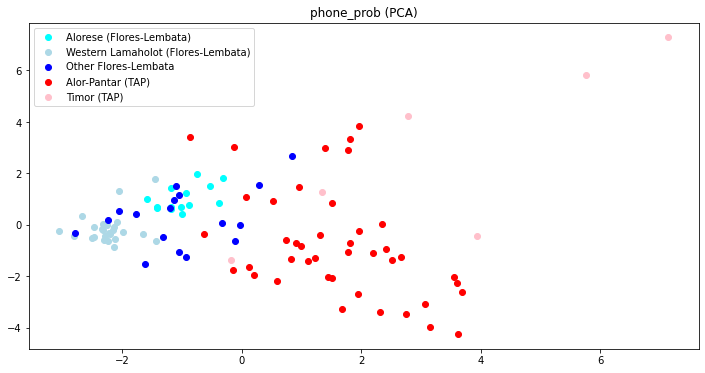

Loadings positive x:


b'_'     0.310769
b's'     0.307490
b'i'     0.262665
b'g'     0.239586
b'z'     0.236691
b'q'     0.219333
b'j'     0.214646
b'ts'    0.213131
b'x'     0.166480
b't'     0.112372
Name: PC1, dtype: float64

Loadings negative x:


b'p'    -0.366187
b'o'    -0.229250
b'k'    -0.224142
b'e'    -0.194422
b'h'    -0.189021
b'u'    -0.167119
b'w'    -0.153133
b'ai'   -0.091729
b'r'    -0.087237
b'd'    -0.072706
Name: PC1, dtype: float64

Loadings positive y:


b''      0.374369
b'l'     0.321370
b'ts'    0.262171
b'z'     0.255493
b'h'     0.232619
b'bv'    0.144769
b'c'     0.111307
b'g'     0.077756
b'_'     0.067088
b'n'     0.063531
Name: PC2, dtype: float64

Loadings negative y:


b'x'   -0.258495
b'q'   -0.254579
b'a'   -0.249268
b'e'   -0.238334
b'j'   -0.224270
b'w'   -0.216341
b'r'   -0.202900
b'm'   -0.184433
b'i'   -0.156067
b's'   -0.120831
Name: PC2, dtype: float64

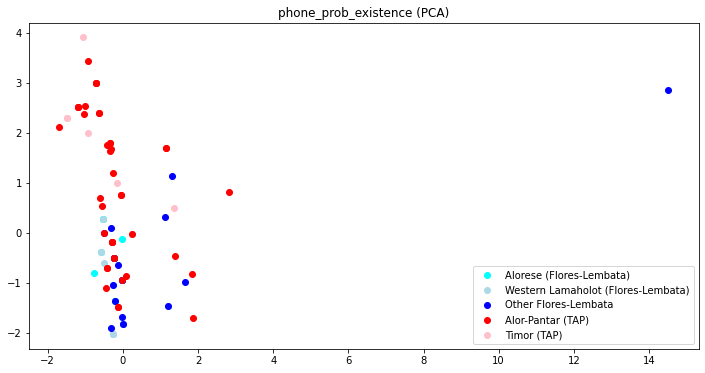

Loadings positive x:


b'v'     1.122103e-01
b'bv'    1.015002e-01
b'h'     3.034912e-02
b's'     9.979753e-04
b'n'     1.665335e-16
b'a'     1.110223e-16
b'b'     5.551115e-17
b''      5.424612e-18
b't'     4.336809e-19
b'i'    -0.000000e+00
Name: PC1, dtype: float64

Loadings negative x:


b'o'    -0.559432
b'e'    -0.559432
b'w'    -0.372617
b'g'    -0.352896
b'+'    -0.141204
b'q'    -0.116352
b'ts'   -0.111266
b'f'    -0.105678
b'x'    -0.105570
b'z'    -0.089197
Name: PC1, dtype: float64

Loadings positive y:


b'v'     0.413308
b'j'     0.389561
b'+'     0.384612
b'q'     0.384326
b'x'     0.356206
b'z'     0.235337
b'f'     0.217896
b'ts'    0.196016
b'dz'    0.165791
b'h'     0.132876
Name: PC2, dtype: float64

Loadings negative y:


b'g'    -1.223756e-01
b'e'    -1.213431e-01
b'o'    -1.213431e-01
b'bv'   -7.645099e-02
b'ai'   -5.480194e-02
b'b'    -1.665335e-16
b'n'    -1.110223e-16
b't'    -8.673617e-19
b'i'    -0.000000e+00
b'd'    -0.000000e+00
Name: PC2, dtype: float64

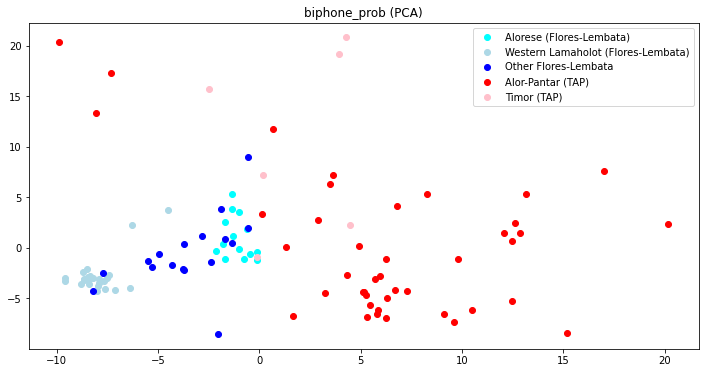

Loadings positive x:


b'r'  b'_'    0.097446
b'a'  b'r'    0.094310
b'i'  b's'    0.093647
b'a'  b'b'    0.089685
b'i'  b'b'    0.088248
b'a'  b'q'    0.086687
b'q'  b'a'    0.086165
b'b'  b'u'    0.085971
b'a'  b's'    0.085227
b'_'  b's'    0.084140
Name: PC1, dtype: float64

Loadings negative x:


b'p'  b''    -0.097137
b''   b'p'   -0.093866
b'k'  b''    -0.092826
b'o'  🡆      -0.092221
b''   b'r'   -0.091472
b'u'  b'h'   -0.091036
b'h'  b'o'   -0.090830
b'e'  🡆      -0.089032
b'a'  b'e'   -0.088085
b''   b'm'   -0.088007
Name: PC1, dtype: float64

Loadings positive y:


b'g'  b''     0.128215
b''   b'l'    0.126761
      b't'    0.126760
b'm'  b''     0.125252
b'h'  b''     0.118725
b'l'  b''     0.118477
b't'  b''     0.118031
b''   b''     0.116284
b'n'  b''     0.114469
🡄     b''     0.099910
Name: PC2, dtype: float64

Loadings negative y:


b'm'  b'e'   -0.119616
b'e'  b'l'   -0.106748
b't'  b'e'   -0.106568
b'b'  b'e'   -0.094985
b'e'  b'k'   -0.085654
b'a'  🡆      -0.084950
b'b'  b'o'   -0.083907
b'l'  b'e'   -0.083573
b'k'  b'o'   -0.082512
b't'  b'o'   -0.082368
Name: PC2, dtype: float64

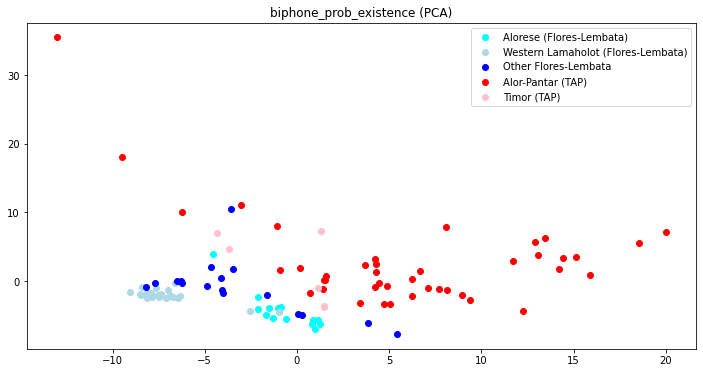

Loadings positive x:


b'_'  b'b'    0.098002
b'q'  b'a'    0.097472
b'i'  b'b'    0.096505
b'_'  b's'    0.096387
b'a'  b'q'    0.096278
🡄     b'q'    0.096278
b'q'  b'o'    0.096278
      b'u'    0.096278
      🡆       0.094090
b'_'  b'g'    0.092999
Name: PC1, dtype: float64

Loadings negative x:


b'l'  b''    -0.090791
b'r'  b''    -0.079687
b''   b'p'   -0.078891
      b'b'   -0.070963
b'a'  b'o'   -0.070509
b''   b'n'   -0.069875
b'a'  b'e'   -0.068349
🡄     b''    -0.067211
b'h'  b'o'   -0.066273
b'n'  b''    -0.064840
Name: PC1, dtype: float64

Loadings positive y:


b'i'  b'c'    0.115164
b'k'  b'g'    0.115164
b'n'  b'b'    0.089408
b'c'  🡆       0.086194
b'm'  b'k'    0.083668
      b'r'    0.079157
b'i'  b'j'    0.063861
🡄     b'j'    0.057464
b'n'  b'l'    0.057178
b'j'  b''     0.056050
Name: PC2, dtype: float64

Loadings negative y:


b'l'  b'a'   -0.123582
b'p'  b'a'   -0.123582
b'a'  b'm'   -0.123582
      b''    -0.123582
      b't'   -0.123582
b'n'  b'i'   -0.123582
b'r'  b'a'   -0.122490
b'p'  b'e'   -0.115598
b'a'  b'n'   -0.115164
      🡆      -0.115164
Name: PC2, dtype: float64

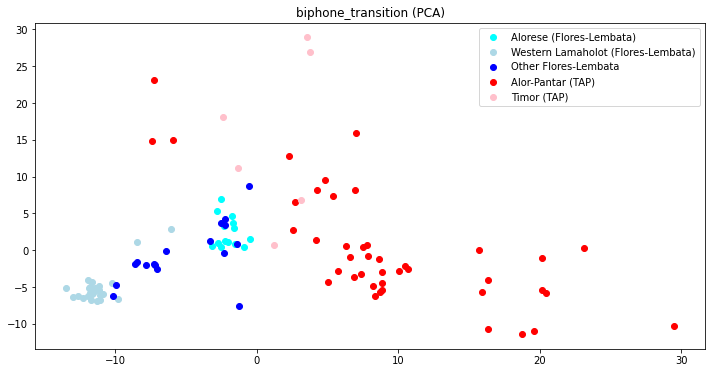

Loadings positive x:


🔙b'a'  🔙b''     0.079943
b'r'   b'_'     0.074786
🔙b'a'  🔙b'l'    0.072793
       🔙b'r'    0.072219
🔙b'i'  🔙b''     0.070445
b'q'   b'a'     0.068441
b'k'   b'i'     0.067189
🔙b'q'  🔙b'a'    0.066464
b'a'   b'q'     0.066066
🔙b'q'  🔙b'_'    0.065602
Name: PC1, dtype: float64

Loadings negative x:


🔙b'k'  🔙b''    -0.072557
🔙b'p'  🔙b'u'   -0.071335
b'o'   🡆       -0.070851
b'i'   b'p'    -0.070838
🔙🡄     🔙b'r'   -0.070831
b''    b'r'    -0.069771
🔙b'r'  🔙b''    -0.069731
b'a'   b'e'    -0.069156
🔙b'p'  🔙b''    -0.069118
b'a'   🡆       -0.068974
Name: PC1, dtype: float64

Loadings positive y:


b'h'   b''      0.094377
b''    b''      0.088849
🔙b''   🔙b''     0.088849
       🔙b't'    0.088609
       🔙b'k'    0.086869
b'm'   b''      0.085961
b'w'   b''      0.083168
b't'   b''      0.081678
🔙b'h'  🔙b''     0.080759
🔙b''   🔙b'h'    0.075877
Name: PC2, dtype: float64

Loadings negative y:


🔙b'e'  🔙b'l'   -0.090547
b'm'   b'e'    -0.085410
b'p'   b'e'    -0.078630
🔙b'r'  🔙b'a'   -0.074249
b'p'   b'i'    -0.070820
b'n'   b'a'    -0.068683
b'g'   b'e'    -0.068104
🔙b'o'  🔙b'l'   -0.067319
       🔙b'r'   -0.067120
b'b'   b'e'    -0.066979
Name: PC2, dtype: float64

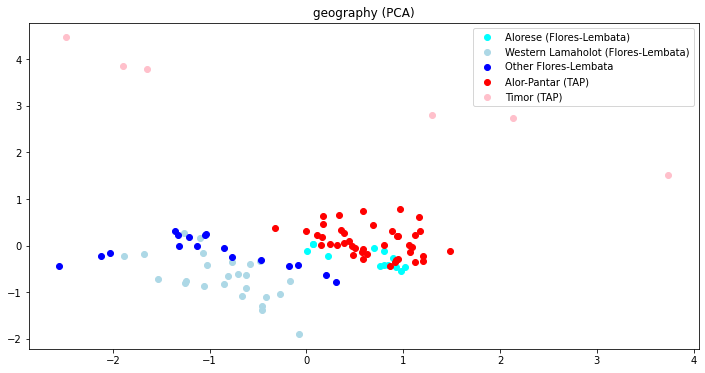

Loadings positive x:


Latitude     0.707107
Longitude    0.707107
Name: PC1, dtype: float64

Loadings negative x:


Longitude    0.707107
Latitude     0.707107
Name: PC1, dtype: float64

Loadings positive y:


Longitude    0.707107
Latitude    -0.707107
Name: PC2, dtype: float64

Loadings negative y:


Latitude    -0.707107
Longitude    0.707107
Name: PC2, dtype: float64

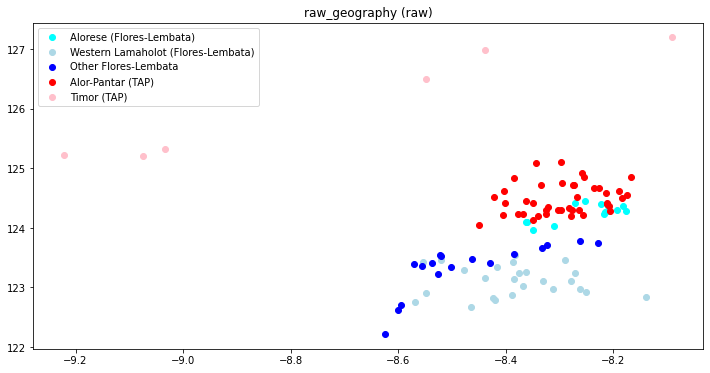

In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

PLOT_LABELS = False

# TODO: Biphone prob with transition probabilities

# Define language groups for plots
language_groups = {"Alorese (Flores-Lembata)": {"color": "cyan", "lects": lects_alorese["ID"]},
                   "Western Lamaholot (Flores-Lembata)": {"color": "lightblue", "lects": lects_western_lamaholot["ID"]},
                   "Other Flores-Lembata": {"color": "blue", "lects": lects_flores_lembata["ID"]},
                   "Alor-Pantar (TAP)": {"color": "red", "lects": lects_alor_pantar["ID"]},
                   "Timor (TAP)": {"color": "pink", "lects": lects_timor["ID"]}
                  }

dim_reds_available = {"PCA": PCA(n_components=2)}#,"MDS": MDS()}

analyses = {"phone_prob": phone_prob_matrix,
            "phone_prob_existence": phone_prob_existence_matrix,
            "biphone_prob": biphone_prob_matrix,
            "biphone_prob_existence": biphone_prob_existence_matrix,
            "biphone_transition": biphone_transition_matrix,
            "geography": data_agg[["Latitude", "Longitude"]].fillna(0),
            "raw_geography": ["Latitude", "Longitude"],
            }

for study_label, study_data in analyses.items():
    if study_label == "raw_geography":
        reduce = False
        plot_cols = study_data
        dim_reds = {"raw": plot_cols}
    else:
        reduce = True
        dim_reds = dim_reds_available
    for dr_label, dr in dim_reds.items():
        common.reduce_plot(study_label, study_data, dr_label, dr, data_agg, language_groups, PLOT_LABELS, reduce)
        if dr_label == "PCA":
            loadings_x_pos, loadings_x_neg, loadings_y_pos, loadings_y_neg = common.compute_loadings(dr, study_data.columns)
            print("Loadings positive x:")
            display(loadings_x_pos)
            print("Loadings negative x:")
            display(loadings_x_neg)
            print("Loadings positive y:")
            display(loadings_y_pos)
            print("Loadings negative y:")
            display(loadings_y_neg)
        